# Intel Image Classification

This notebook is a simple example of how to use the Intel Image Classification dataset to train a model using PyTorch. The dataset consists of 25,000 images of size 150x150 distributed in 6 classes: buildings, forest, glacier, mountain, sea, and street. The goal is to train a model that can classify these images into one of these classes.

The dataset is available in the [Intel Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification) dataset on Kaggle.

Let's start by loading the data.

## Loading the data

Let's start by import the necessary libraries and loading the data.

In [2]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we can load the data

In [3]:
# Loading the dataset
train_path = 'archive/seg_train/seg_train/'
test_path = 'archive/seg_test/seg_test/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)

# Checking the shape of the dataset
print()
print("Shape of the training set: ", X_train.shape)
print("Shape of the testing set: ", X_test.shape)
print("Number of images in the training set: ", X_train.shape[0])
print("Number of images in the testing set: ", X_test.shape[0])

100%|██████████| 510/510 [00:00<00:00, 2374.70it/s]


Shape of the training set:  (14034, 150, 150, 3)
Shape of the testing set:  (3000, 150, 150, 3)
Number of images in the training set:  14034
Number of images in the testing set:  3000


Now let's check the unique classes in the dataset.

In [4]:
# Checking the unique classes
classes_names = np.unique(y_train)

print(classes_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


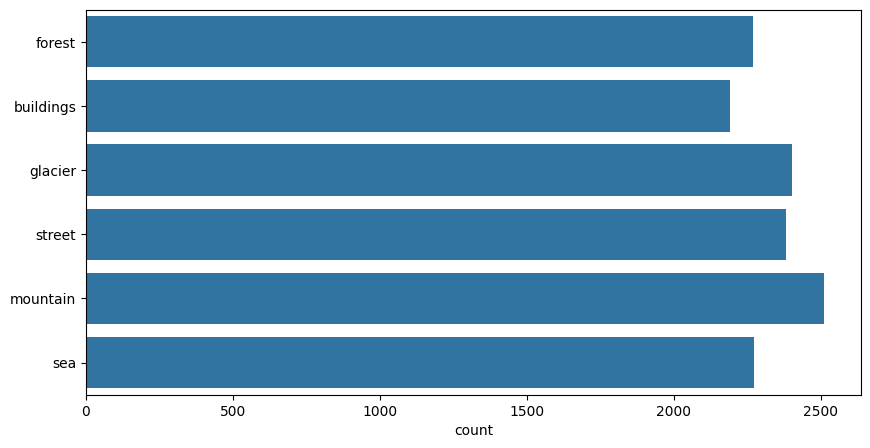

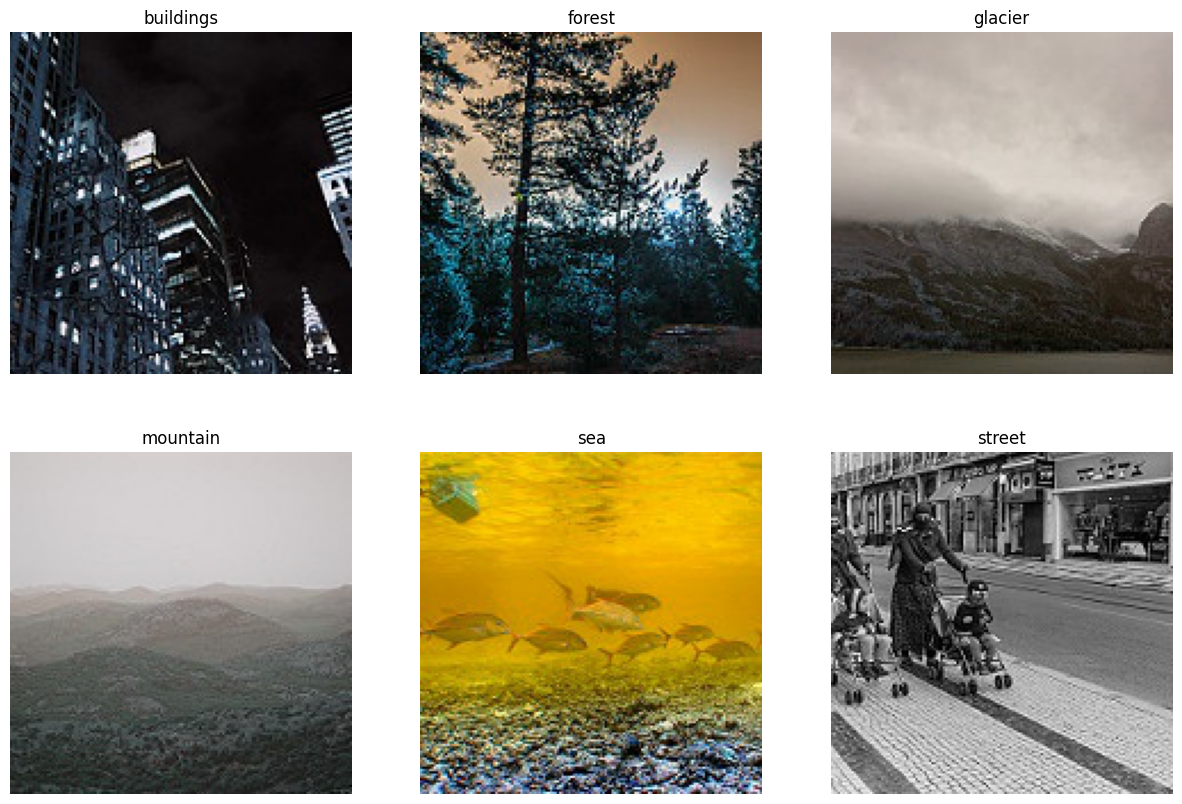

In [5]:
# Checking the distribution of the classes
plt.figure(figsize=(10, 5))
sns.countplot(y_train)
plt.show()

# Plotting the images for each class
plt.figure(figsize=(15, 10))
printed = []

for class_name in classes_names:
    for i in range(len(y_train)):
        if y_train[i] == class_name and class_name not in printed:
            plt.subplot(2, 3, len(printed) + 1)
            plt.imshow(X_train[i])
            plt.title(class_name)
            plt.axis('off')
            printed.append(class_name)
            break
    
plt.show()


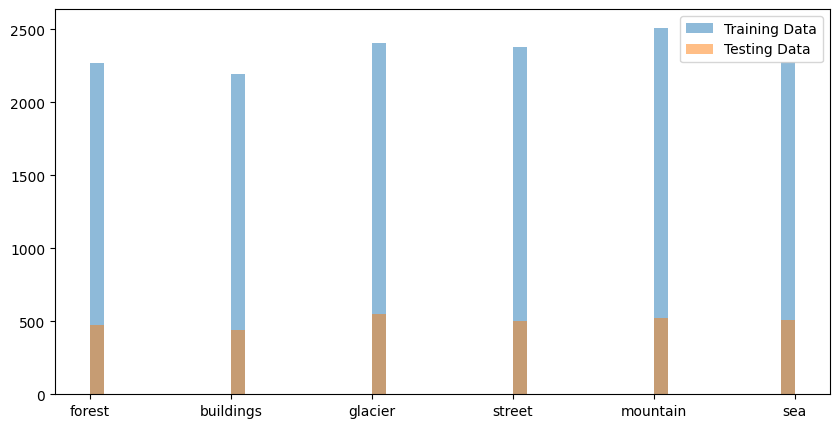

In [45]:
# Histogram to show the distribution training data and testing data

plt.figure(figsize=(10, 5))
plt.hist(y_train, alpha=0.5, bins=50, label='Training Data')
plt.hist(y_test, alpha=0.5, bins=50,  label='Testing Data')
plt.legend()
plt.show()

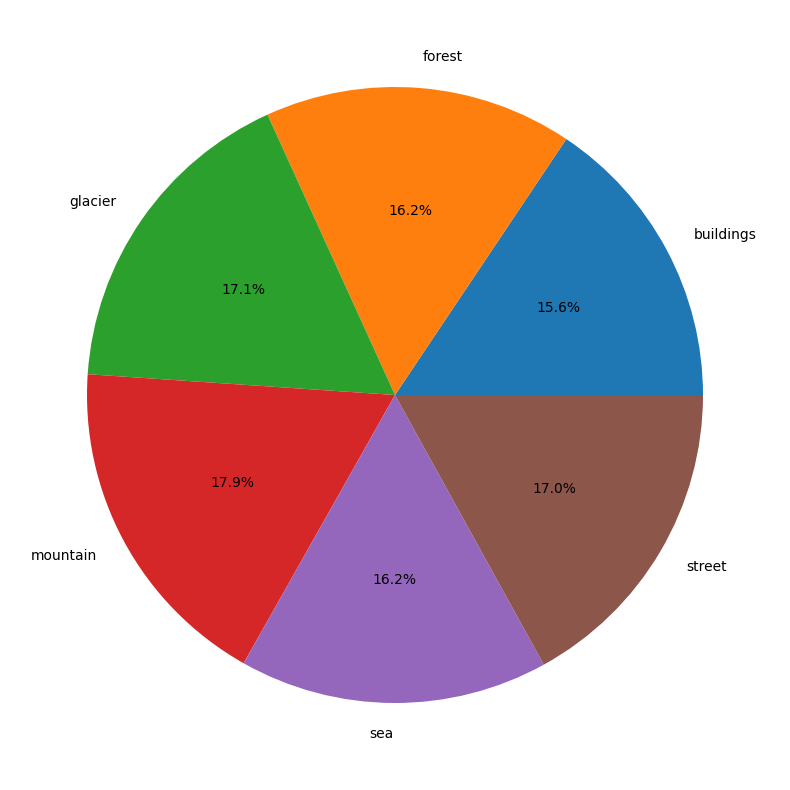

In [46]:
# Pie chart to show the distribution of the classes
plt.figure(figsize=(10, 10))
plt.pie([len(y_train[y_train == class_name]) for class_name in classes_names], labels=classes_names, autopct='%1.1f%%')
plt.show()

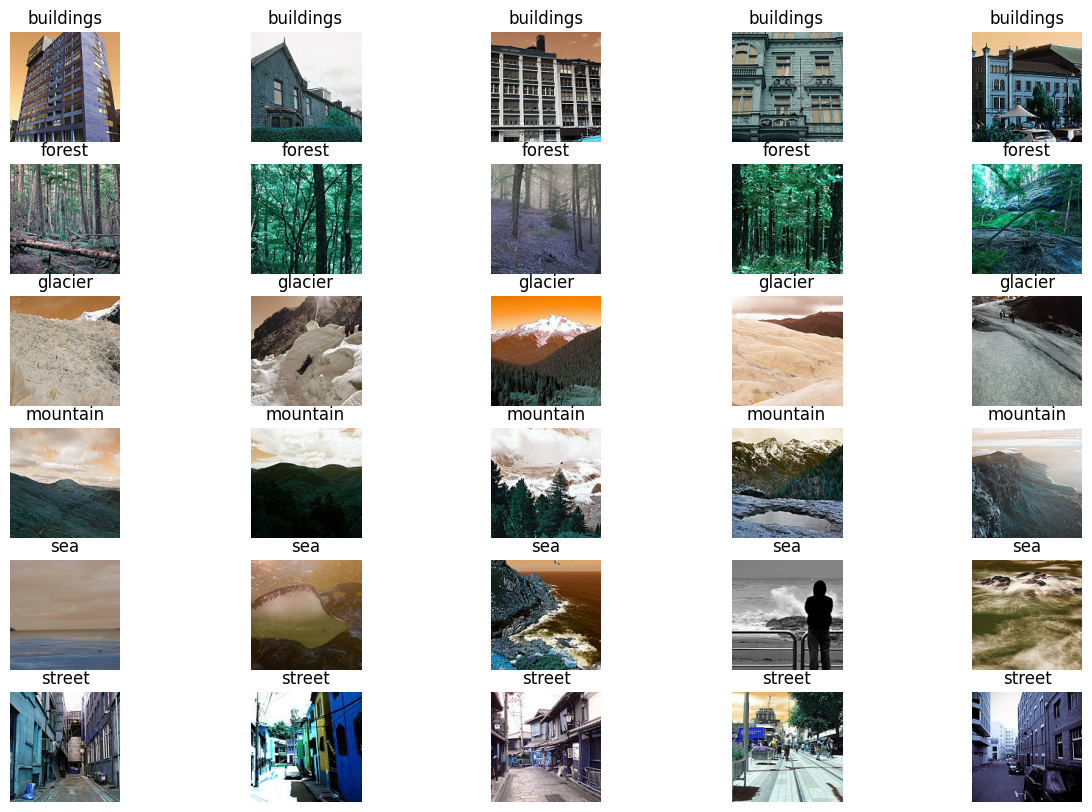

In [49]:
# Function to display random images from the dataset

def display_random_images(X, y, classes_names, number_of_images=5):
    plt.figure(figsize=(15, 10))

    for class_name in classes_names:
        for i in range(number_of_images):
            plt.subplot(len(classes_names), number_of_images, number_of_images * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[y == class_name][np.random.randint(0, len(X[y == class_name]))])
            plt.title(class_name)
            plt.axis('off')
    
    plt.show()

display_random_images(X_train, y_train, classes_names)

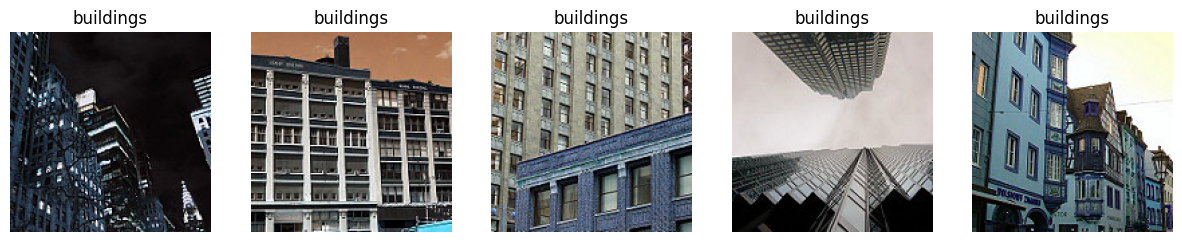

In [50]:
# Function to display the images of a particular class

def display_images_of_class(X, y, class_name, number_of_images=5):
    plt.figure(figsize=(15, 10))

    for i in range(number_of_images):
        plt.subplot(1, number_of_images, i + 1)
        plt.imshow(X[y == class_name][i])
        plt.title(class_name)
        plt.axis('off')
    
    plt.show()

display_images_of_class(X_train, y_train, 'buildings')

In [10]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One hot encoding the target variable
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Splitting the training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=0)

# Normalizing the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2024-05-11 19:39:51.786963: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


351/351 [==============================] - 108s 303ms/step - loss: 1.1346 - accuracy: 0.5562 - val_loss: 0.8465 - val_accuracy: 0.6591
Epoch 2/10
351/351 [==============================] - 93s 266ms/step - loss: 0.8688 - accuracy: 0.6755 - val_loss: 0.7441 - val_accuracy: 0.7257
Epoch 3/10
351/351 [==============================] - 94s 267ms/step - loss: 0.7140 - accuracy: 0.7362 - val_loss: 0.6346 - val_accuracy: 0.7645
Epoch 4/10
351/351 [==============================] - 96s 273ms/step - loss: 0.6121 - accuracy: 0.7798 - val_loss: 0.5874 - val_accuracy: 0.7880
Epoch 5/10
351/351 [==============================] - 88s 250ms/step - loss: 0.5149 - accuracy: 0.8176 - val_loss: 0.6423 - val_accuracy: 0.7731
Epoch 6/10
351/351 [==============================] - 89s 253ms/step - loss: 0.4539 - accuracy: 0.8346 - val_loss: 0.5365 - val_accuracy: 0.8147
Epoch 7/10
351/351 [==============================] - 88s 249ms/step - loss: 0.3803 - accuracy: 0.8651 - val_loss: 0.5756 - val_accuracy: 0.

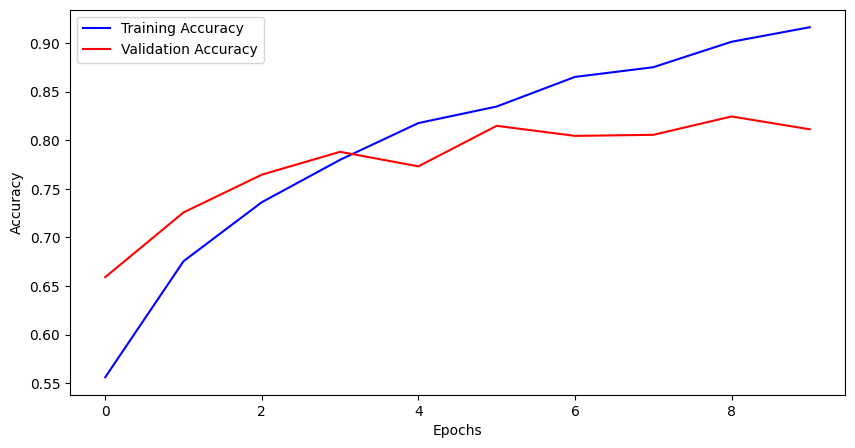

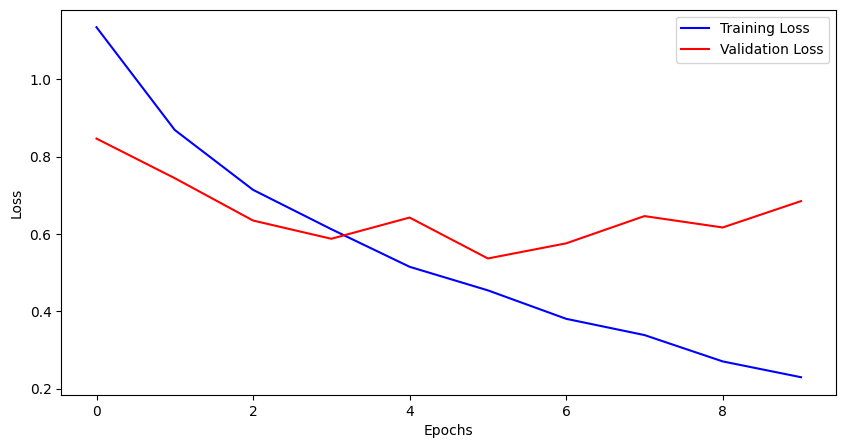

94/94 [==============================] - 7s 68ms/step - loss: 0.6414 - accuracy: 0.8227
Test Loss:  0.6413540244102478
Test Accuracy:  0.8226666450500488
94/94 [==============================] - 8s 74ms/step


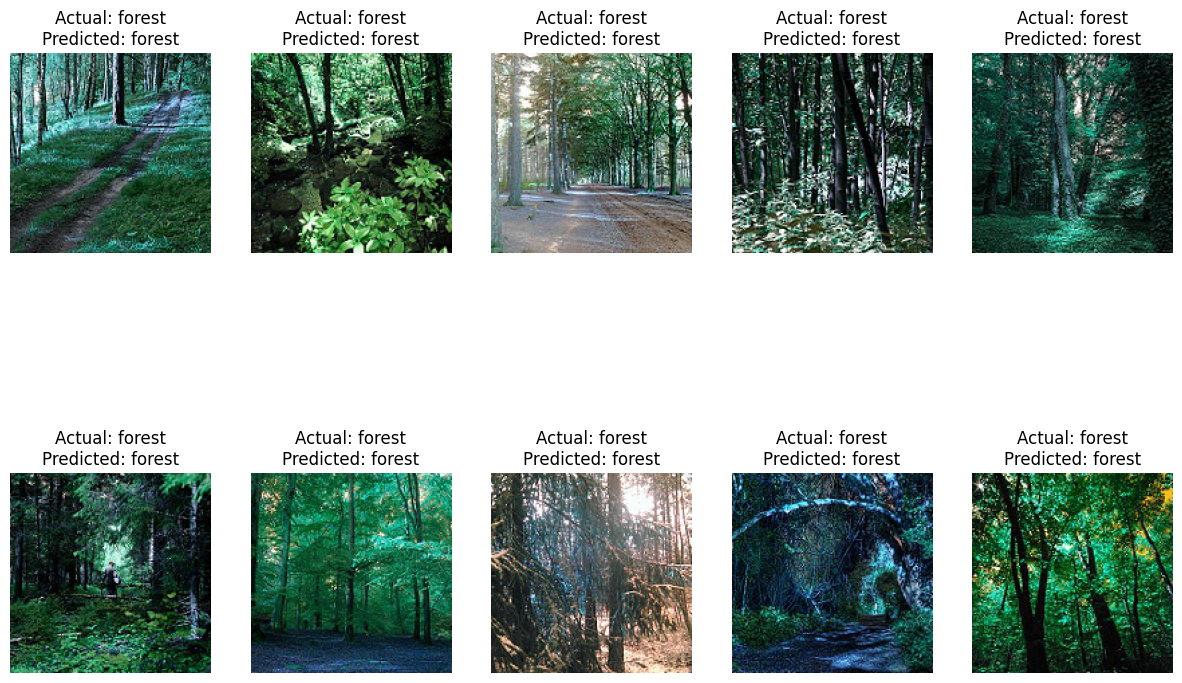

In [53]:
# Building the CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating the model

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

# Making predictions
predictions = model.predict(X_test)

# Displaying the images with their predictions
plt.figure(figsize=(15, 10))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title("Actual: " + label_encoder.classes_[np.argmax(y_test_encoded[i])] + "\nPredicted: " + label_encoder.classes_[np.argmax(predictions[i])])
    plt.axis('off')

plt.show()


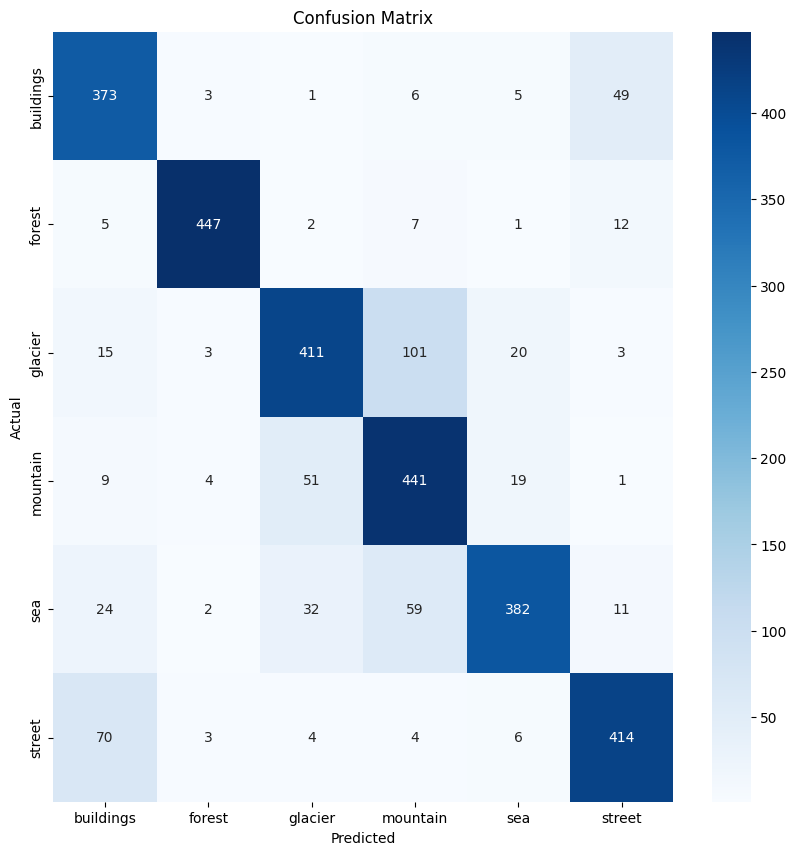

In [54]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), target_names=classes_names))

# Saving the model
model.save('cnn_model.h5')

2024-06-05 16:38:41.434874: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


94/94 [==============================] - 10s 100ms/step


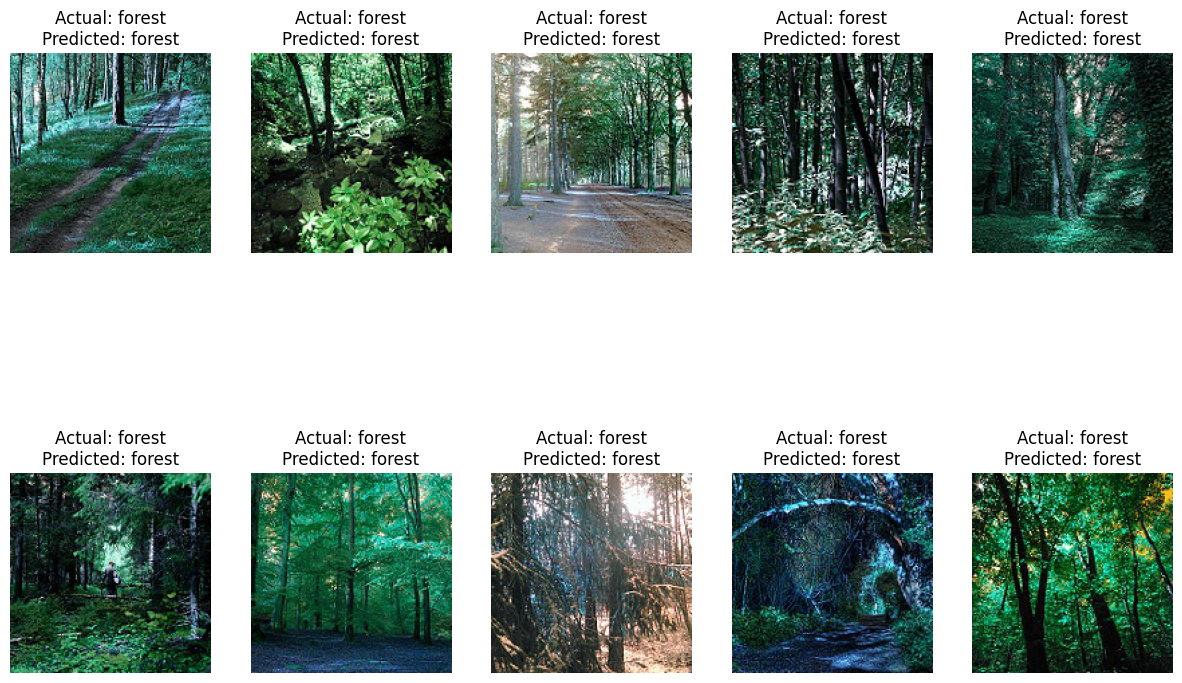

In [12]:
# Loading the model
from keras.models import load_model

model = load_model('cnn_model.h5')

# Making predictions
predictions = model.predict(X_test)

# Displaying the images with their predictions
plt.figure(figsize=(15, 10))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title("Actual: " + label_encoder.classes_[np.argmax(y_test_encoded[i])] + "\nPredicted: " + label_encoder.classes_[np.argmax(predictions[i])])
    plt.axis('off')

plt.show()

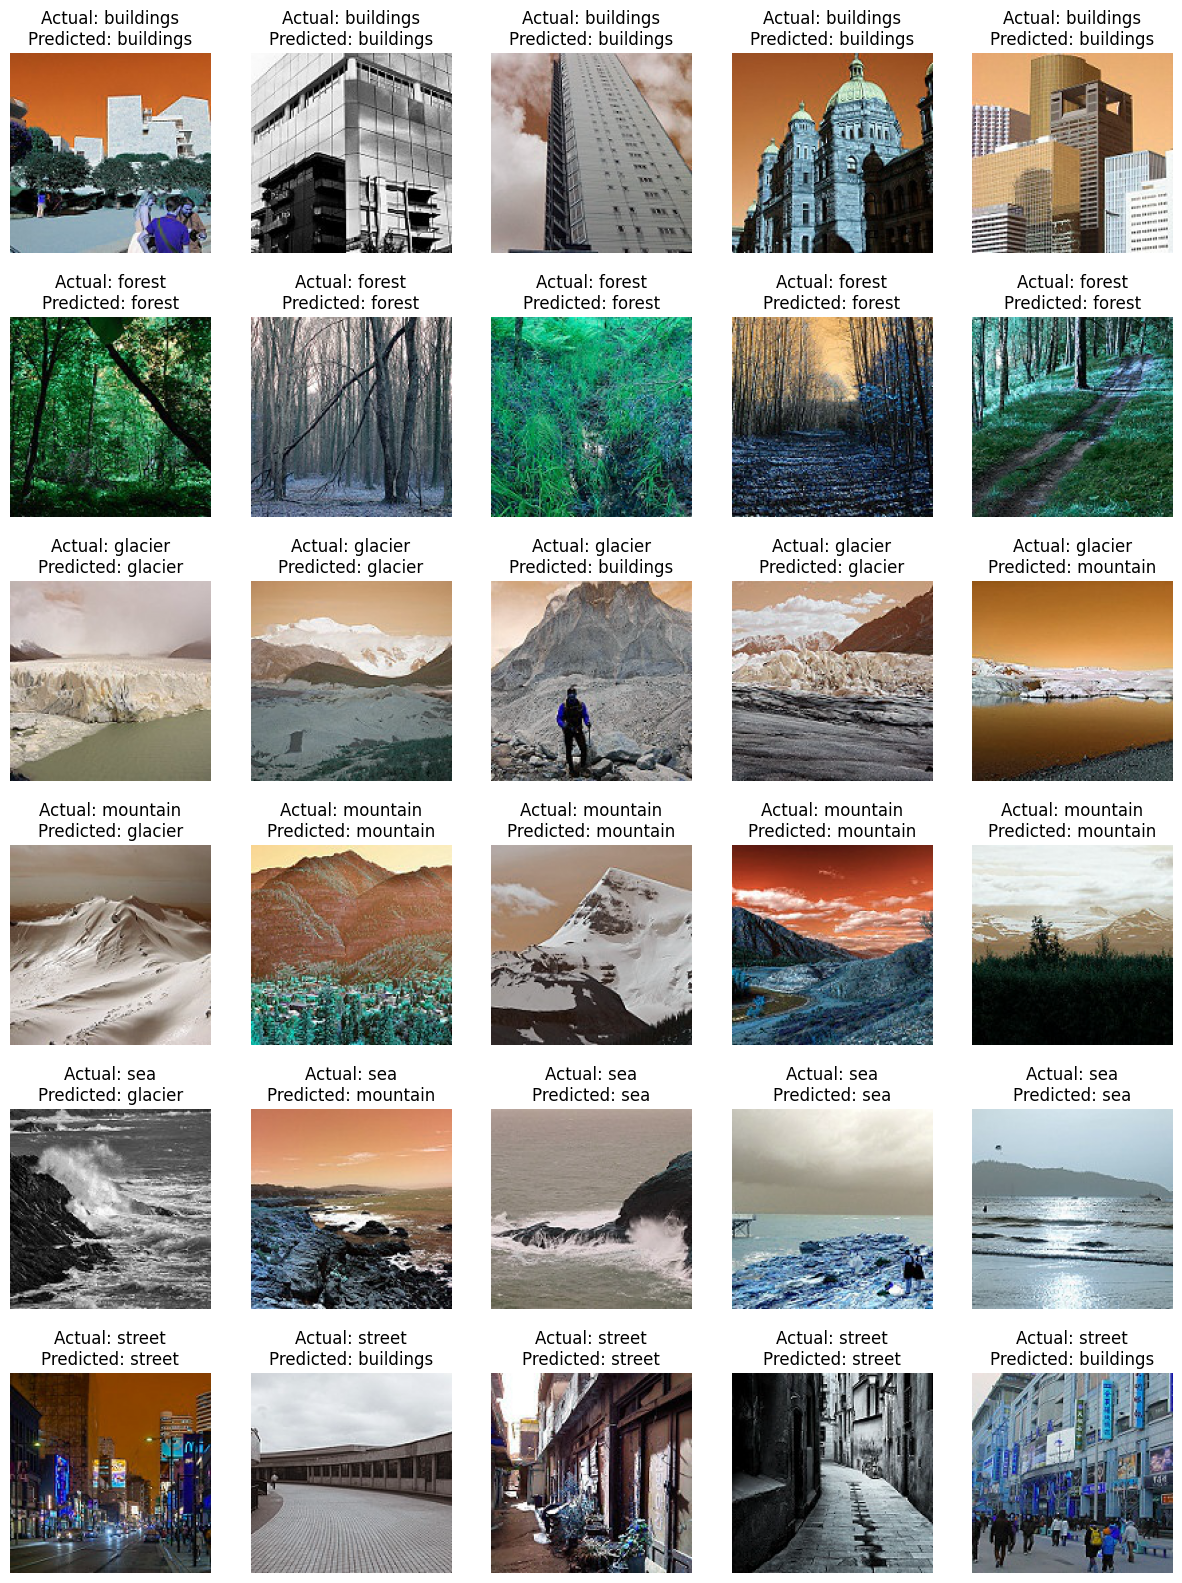

In [13]:
# Function to displaying random predictions from the dataset with their images and predictions

def display_random_predictions(X, y, predictions, classes_names, number_of_predictions=5):
    plt.figure(figsize=(15, 20))

    for class_name in classes_names:
        for i in range(number_of_predictions):
            index = np.random.choice(np.where(y == class_name)[0])
            plt.subplot(len(classes_names), number_of_predictions, number_of_predictions * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[index])
            plt.title("Actual: " + class_name + "\nPredicted: " + label_encoder.classes_[np.argmax(predictions[index])])
            plt.axis('off')
    
    plt.show()

display_random_predictions(X_test, y_test, predictions, classes_names)

F1 Score:  0.823441955176108
Precision:  0.8295868788162232
Recall:  0.8226666666666667
Accuracy:  0.8226666666666667


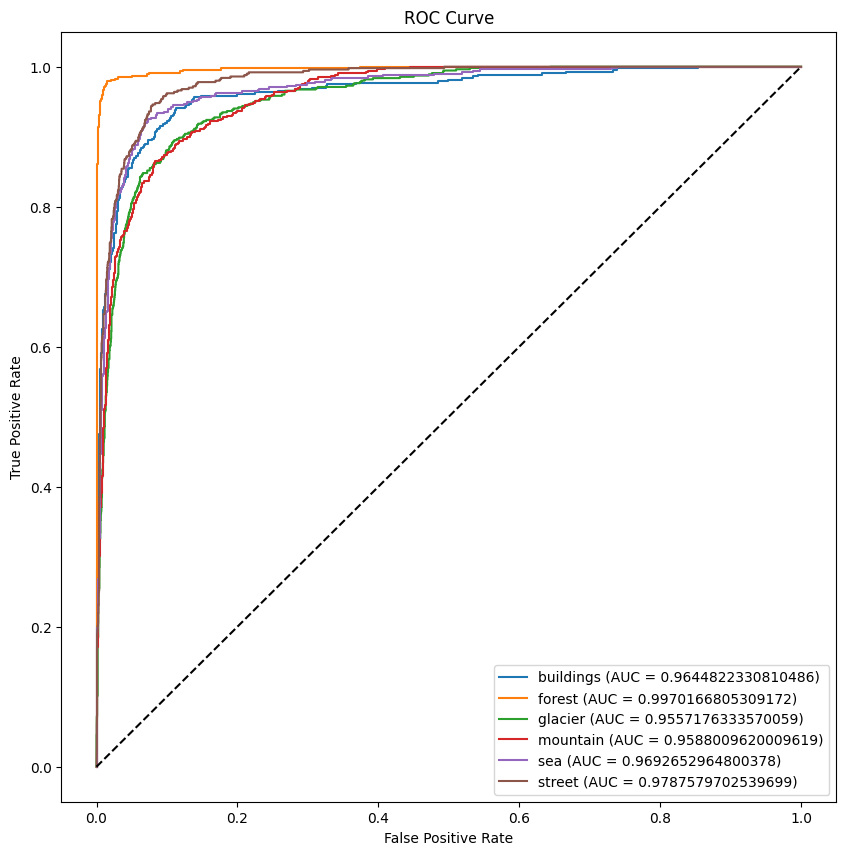

              precision    recall  f1-score   support

   buildings       0.75      0.85      0.80       437
      forest       0.97      0.94      0.96       474
     glacier       0.82      0.74      0.78       553
    mountain       0.71      0.84      0.77       525
         sea       0.88      0.75      0.81       510
      street       0.84      0.83      0.84       501

    accuracy                           0.82      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.82      0.82      3000



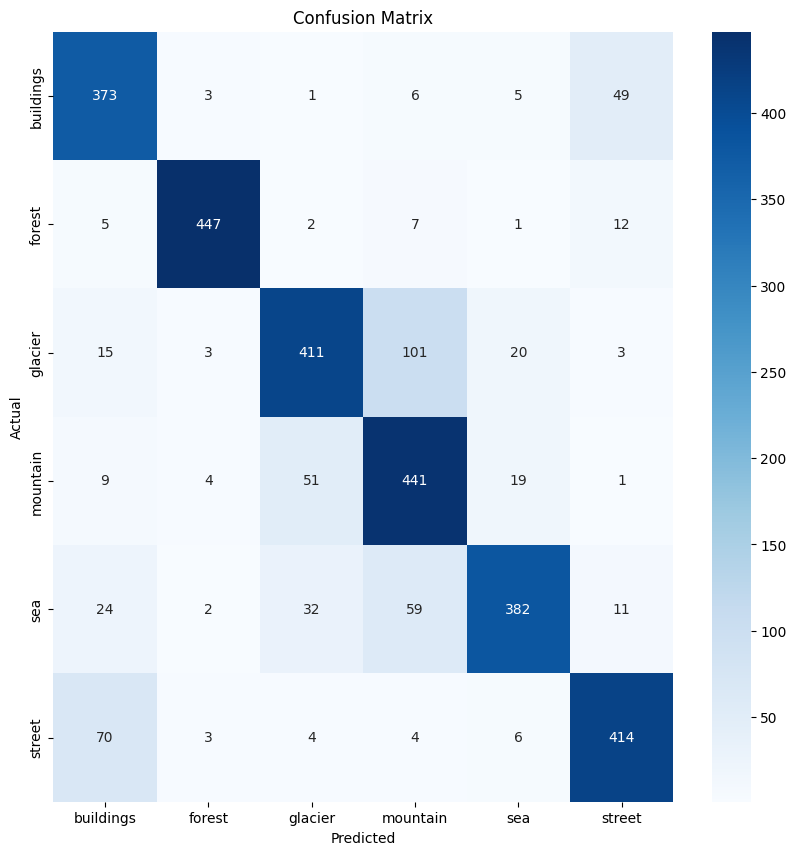

In [14]:
# f1 score, precision, recall, accuracy, confusion matrix, classification report, and ROC curve

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc

# F1 Score
f1 = f1_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("F1 Score: ", f1)

# Precision
precision = precision_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("Precision: ", precision)

# Recall
recall = recall_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("Recall: ", recall)

# Accuracy
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))
print("Accuracy: ", accuracy)

# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 10))

for i in range(6):
    plt.plot(fpr[i], tpr[i], label=classes_names[i] + ' (AUC = ' + str(roc_auc[i]) + ')')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

# Classification Report
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), target_names=classes_names))

# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

